0.004892046101423446
0.17516739184862817
3.1396258532106147
4.624407975109833
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


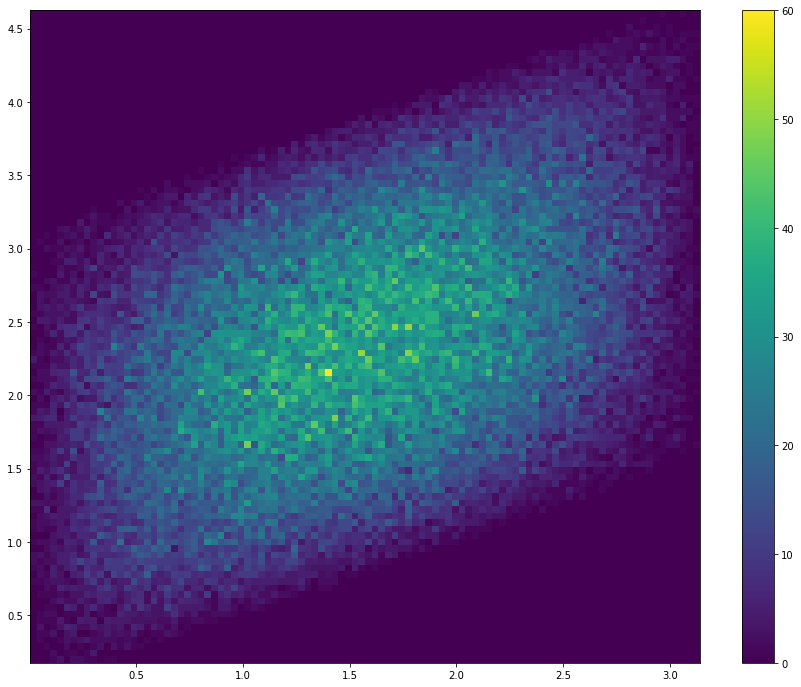

In [18]:
# try a 2d histogram for radiance
import numpy as np
import matplotlib.pyplot as plt

size = 100000
x = np.random.random(size)
x = np.arccos(x*2-1)
y = np.random.random(size)
y = np.arccos(y*2-1)
y = y + x/2
print(np.min(x))
print(np.min(y))

print(np.max(x))
print(np.max(y))


fig=plt.figure(figsize=[15,12])
(h, xedges, yedges, image) = plt.hist2d(x,y,bins=100)
print(h)
plt.colorbar()
plt.show()

In [1]:
# try a 4d histogram

import optics_cuda

source = optics_cuda.MonochromaticLambertianSource(0.001, 0.001, 555, 5e7, 0.001)
photons = source.make_photons(10000000)


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [6]:
import cupy as cp
points = (photons.r_x, photons.r_y, cp.arccos(photons.ez_z), cp.arctan2(photons.ez_y, photons.ez_x)) 
(h, edges) = cp.histogramdd(points, bins=10, range=None, weights=None, density=False)

In [7]:
print(h)

[[[[ 253.  274.  238. ...  243.  221.  272.]
   [ 700.  746.  741. ...  685.  705.  662.]
   [1089. 1101. 1099. ... 1058. 1066. 1164.]
   ...
   [1093. 1087. 1117. ... 1132. 1055. 1100.]
   [ 768.  747.  632. ...  709.  734.  674.]
   [ 240.  218.  270. ...  254.  246.  219.]]

  [[ 248.  217.  262. ...  267.  253.  243.]
   [ 695.  750.  728. ...  711.  692.  738.]
   [1167. 1142. 1061. ... 1161. 1119. 1061.]
   ...
   [1059. 1060. 1084. ... 1076. 1098. 1107.]
   [ 698.  712.  670. ...  746.  690.  733.]
   [ 239.  246.  228. ...  218.  260.  234.]]

  [[ 234.  213.  238. ...  244.  241.  272.]
   [ 676.  745.  715. ...  739.  718.  766.]
   [1121. 1202. 1105. ... 1053. 1135. 1055.]
   ...
   [1095. 1129. 1148. ... 1122. 1089. 1137.]
   [ 704.  726.  690. ...  715.  736.  682.]
   [ 251.  237.  233. ...  272.  234.  256.]]

  ...

  [[ 253.  238.  252. ...  232.  276.  238.]
   [ 716.  724.  703. ...  690.  734.  734.]
   [1098. 1107. 1145. ... 1065. 1035. 1100.]
   ...
   [1086. 1161